In [2]:
import os
import sys

global SRC
SRC = '/home/547/bm5478/uncover-ml'
os.environ['UNCOVERML_SRC'] = SRC
sys.path.append(os.path.join(SRC, 'uncoverml'))

In [ ]:
import os

from uncoverml import diagnostics


# Path to feature ranking scores file.
path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest', 
                    'precomputed', 'learn', 'sirsam_Na_randomforest_featureranks.json')

feature_ranks_figure = diagnostics.plot_feature_ranks(path)
    

In [ ]:
import os

from uncoverml import diagnostics


path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'precomputed', 'learn', 'sirsam_Na_randomforest_rawcovariates.csv')

intersection = diagnostics.plot_covariates_x_targets(path, cols=2)
    

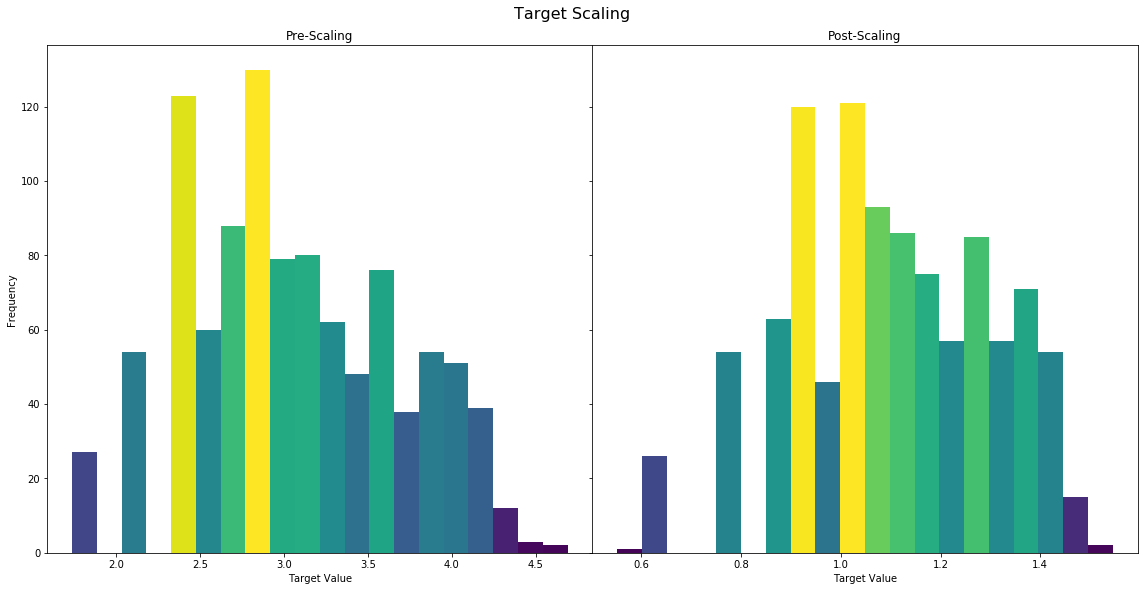

In [33]:
import os

from uncoverml import diagnostics


path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest', 'out',
                    'sirsam_Na_randomforest_transformed_targets.csv')

target_histograms = diagnostics.plot_target_scaling(path)


In [ ]:
import os
import csv

from uncoverml import diagnostics


path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'precomputed', 'learn', 'sirsam_Na_randomforest_rawcovariates.csv')

correlation = diagnostics.plot_covariate_correlation(path)


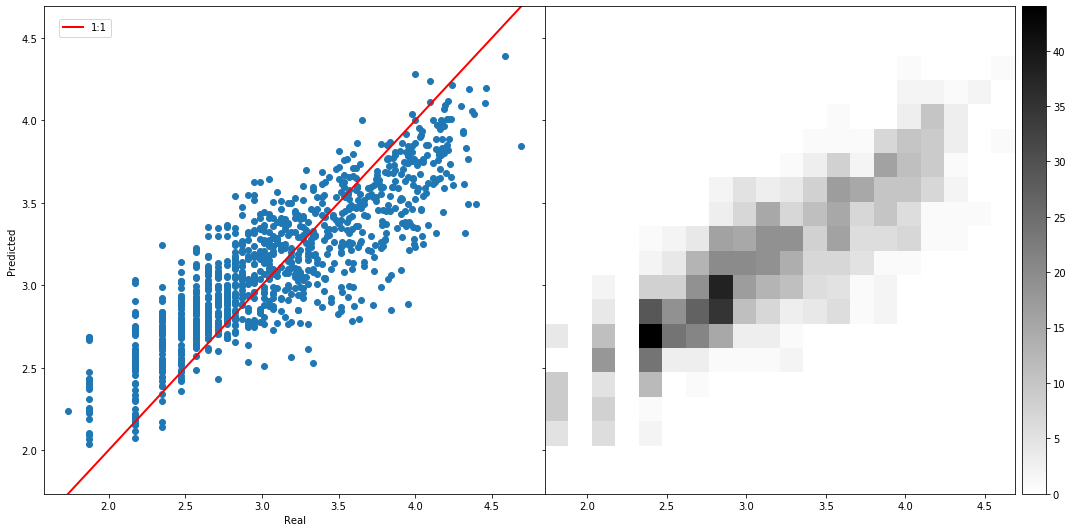

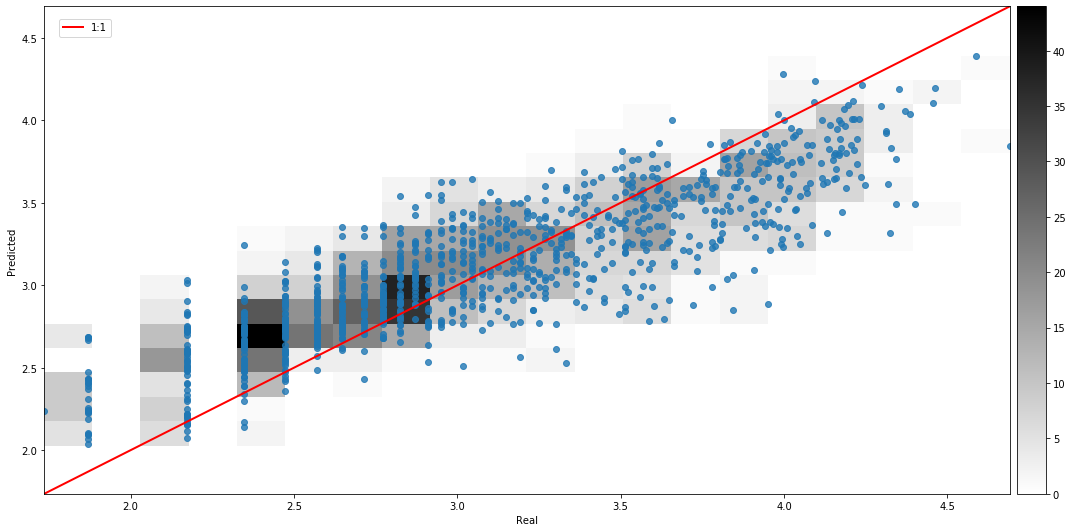

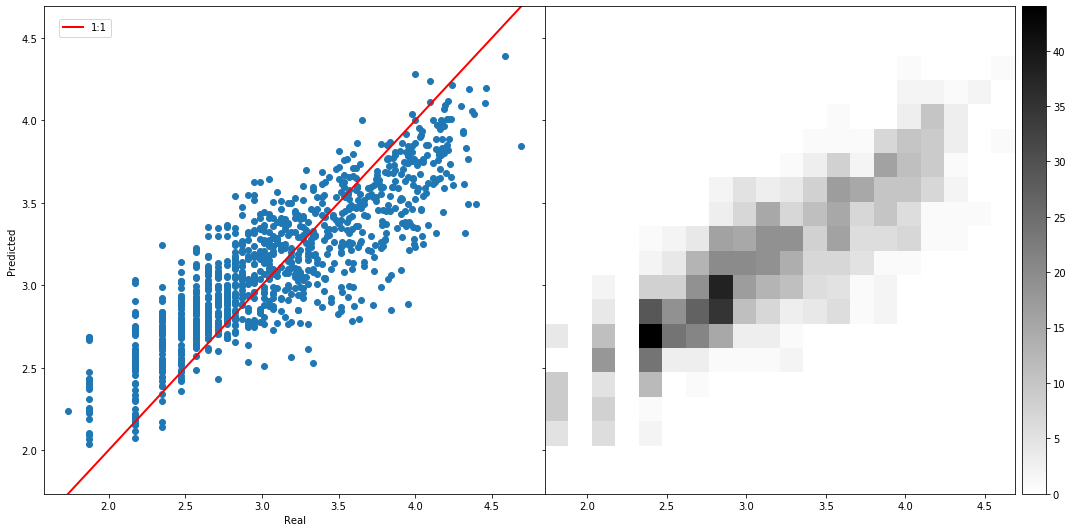

In [56]:
import os

import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

#from uncoverml import diagnostics
from uncoverml import patch
from uncoverml import config
from uncoverml import geoio


rc_path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_rawcovariates.csv')
pred_path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_prediction.tif')

targets = pd.read_csv(rc_path, float_precision='round_trip')
targets.drop(list(targets.columns.values)[:-3], axis=1, inplace=True)
tx, ty, tn = targets.columns.values
targets = [(x, y, obs) for x, y, obs in zip(targets[tx], targets[ty], targets[tn])]

targets_ar = np.zeros(len(targets))
predict_ar = np.zeros(len(targets))

with rasterio.open(pred_path) as ds:
    ar = ds.read(1)
    for i, (x, y, obs) in enumerate(targets):
        ind = ds.index(x, y)
        targets_ar[i] = obs
        predict_ar[i] = ar[ind]

def _side_by_side(targets_ar, predict_ar):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7.5), sharey=True, gridspec_kw={'wspace': 0})
    
    for ax in axs:
        ax.set_xlabel('Real')
        ax.set_ylabel('Predicted')
        ax.label_outer()

        bin_limits = ([targets_ar.min(), targets_ar.max()], [targets_ar.min(), targets_ar.max()])
        hist = axs[1].hist2d(targets_ar, predict_ar, bins=20, range=bin_limits, cmap=plt.cm.binary, alpha=1)
        divider = make_axes_locatable(axs[1])
        cb_axis = divider.append_axes('right', size="5%", pad=0.1)
        fig.colorbar(hist[3], cax=cb_axis)
        
        axs[0].scatter(targets_ar, predict_ar)
        axs[0].plot([targets_ar.min(), targets_ar.max()], [targets_ar.min(), targets_ar.max()],
                    color='r', linewidth=2, label='1:1')

        fig.legend(loc='upper left', bbox_to_anchor=(0.05, 0.96))
        fig.tight_layout()
        return fig

def _overlay(targets_ar, predict_ar):
    fig, ax = plt.subplots(figsize=(15, 7.5))
    ax.set_xlabel('Real')
    ax.set_ylabel('Predicted')

    bin_limits = ([targets_ar.min(), targets_ar.max()], [targets_ar.min(), targets_ar.max()])
    hist = ax.hist2d(targets_ar, predict_ar, bins=20, range=bin_limits, cmap=plt.cm.binary)
    divider = make_axes_locatable(ax)
    cb_axis = divider.append_axes('right', size="3%", pad=0.1)
    fig.colorbar(hist[3], cax=cb_axis)
    
    ax.scatter(targets_ar, predict_ar, alpha=0.8)
    ax.plot([targets_ar.min(), targets_ar.max()], [targets_ar.min(), targets_ar.max()],
            color='r', linewidth=2, label='1:1')
    

    fig.legend(loc='upper left', bbox_to_anchor=(0.05, 0.96))
    fig.tight_layout()
    return fig

_overlay(targets_ar, predict_ar)
_side_by_side(targets_ar, predict_ar)
